<a href="https://colab.research.google.com/github/khaled-benahmed/Customer-Churn-Prediction-in-the-Telecom-Sector-Using-Machine-Learning-Techniques./blob/Paper3/Customer_Churn_Prediction_in_the_Telecom_Sector_Using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

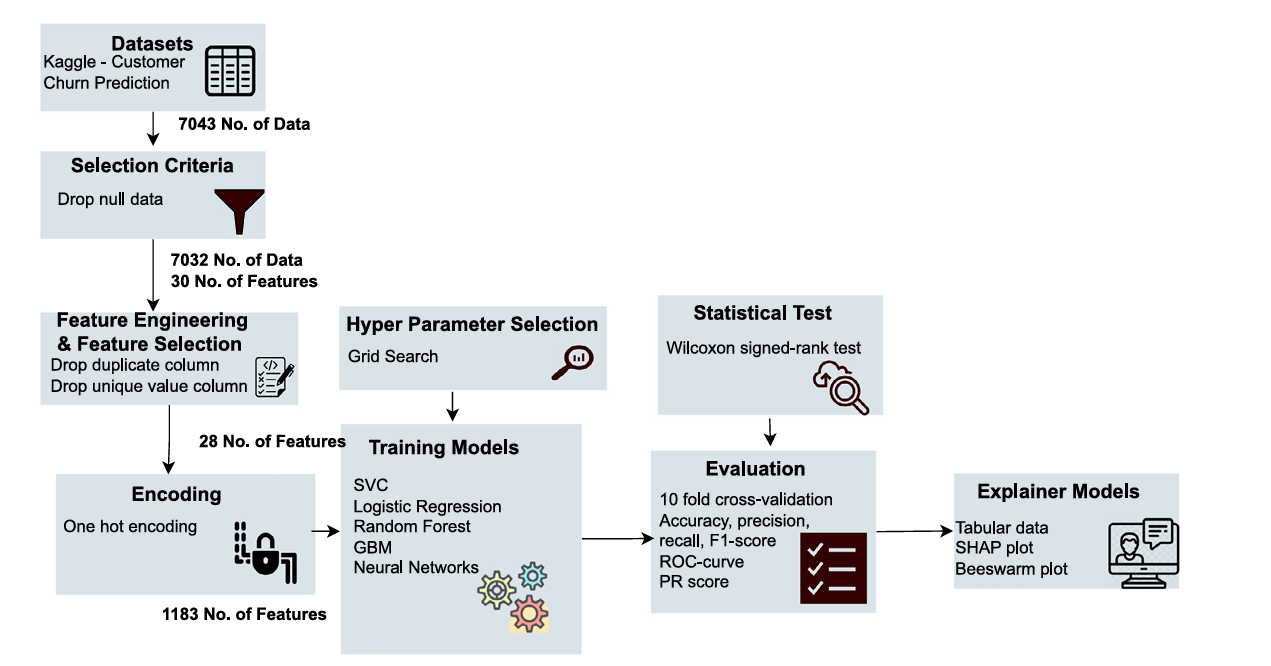

In [ ]:
!pip install lazypredict

In [ ]:
pip install mlflow

In [ ]:
!pip install lime

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import mlflow
import plotly.express as px
from sklearn.metrics import confusion_matrix
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.offline as py # visualization

import mlflow.sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

from imblearn.combine import SMOTEENN
import shap
import lime
import lime.lime_tabular
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
data_80 = pd.read_csv('/content/churn-bigml-20.csv')
data_20 = pd.read_csv('/content/churn-bigml-80.csv')

# Concatenate datasets by rows
data = pd.concat([data_80, data_20], axis=0, ignore_index=True)


In [ ]:
data.shape

(3333, 20)

In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
data.columns.astype(str)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
sum(data.duplicated())

0

In [ ]:
# Counting unique values for each column in the DataFrame
unique_counts = data.nunique()

print(unique_counts)

Account length            212
Area code                   3
Number vmail messages      46
Total day minutes         297
Total day calls           119
Total day charge           60
Total eve minutes         284
Total eve calls           123
Total eve charge           30
Total night minutes       281
Total night calls         120
Total night charge         17
Total intl minutes         20
Total intl calls           21
Total intl charge           6
Customer service calls     10
Churn                       2
International plan_Yes      2
Voice mail plan_Yes         2
Region_Northeast            2
Region_South                2
Region_West                 2
dtype: int64


In [ ]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,2850
1,483


In [ ]:
# Categorical Columns
categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']

# Continuous Columns
continuous_cols = [col for col in data.columns if col not in categorical_cols]

### Univariate analysis

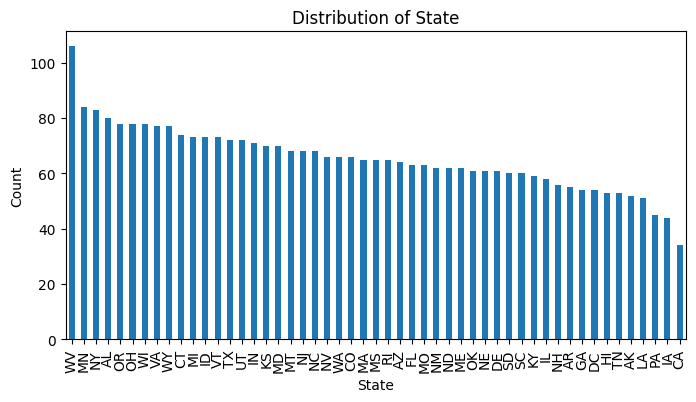

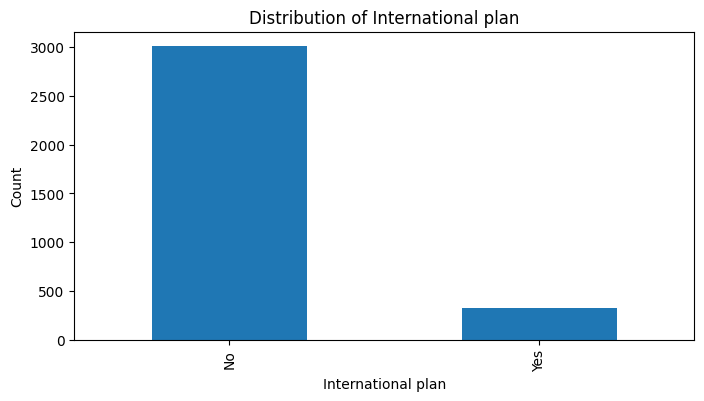

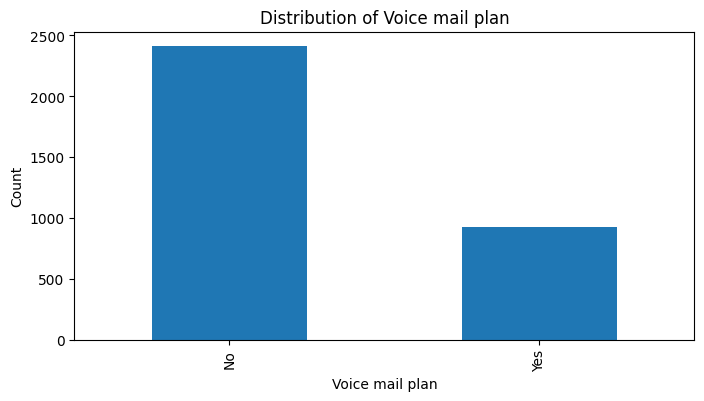

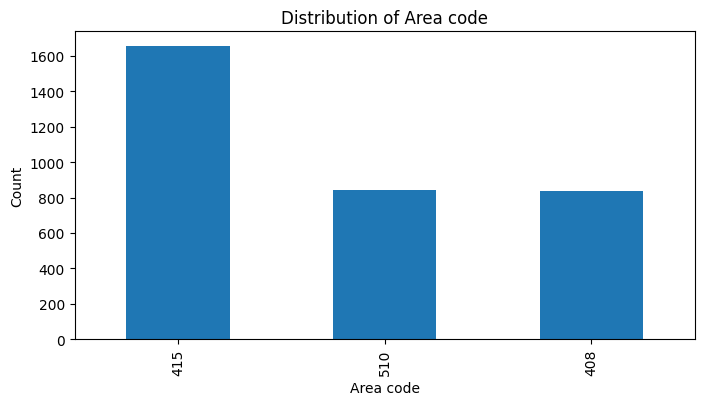

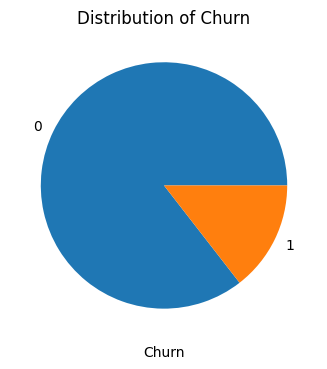

In [ ]:
# Plotting categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar' if col != 'Churn' else 'pie')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count' if col != 'Churn' else '')
    plt.xlabel(col)
    plt.show()

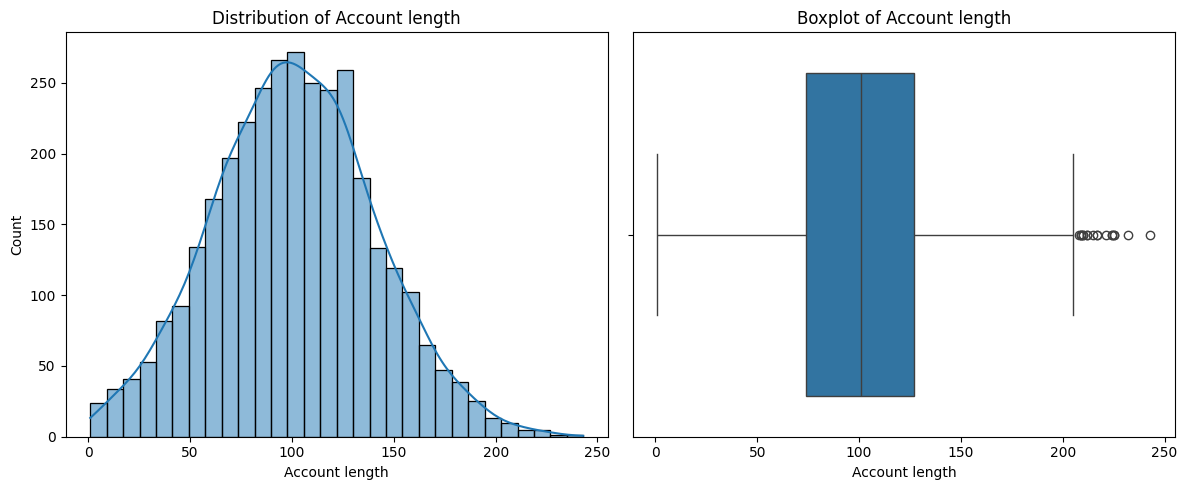

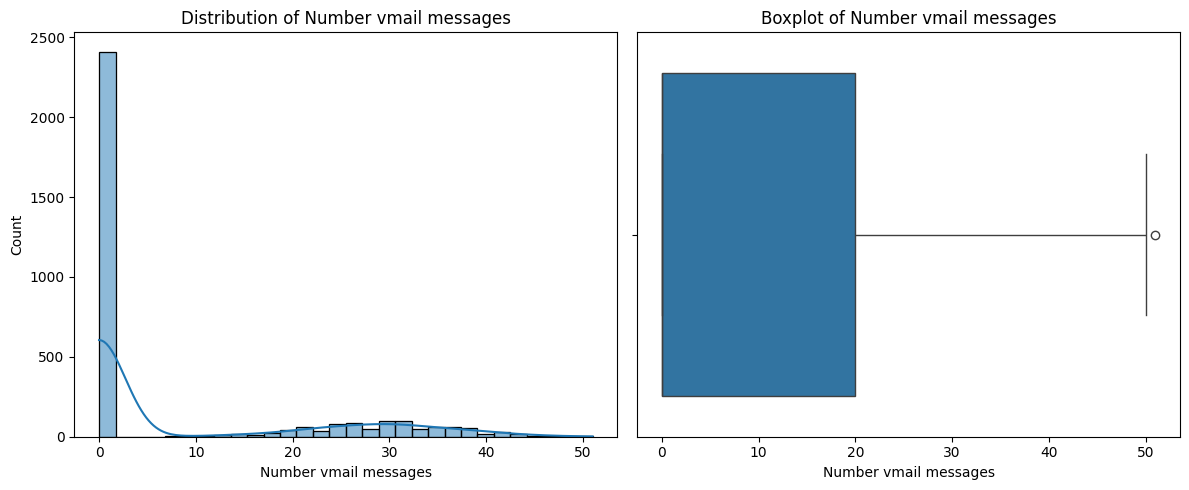

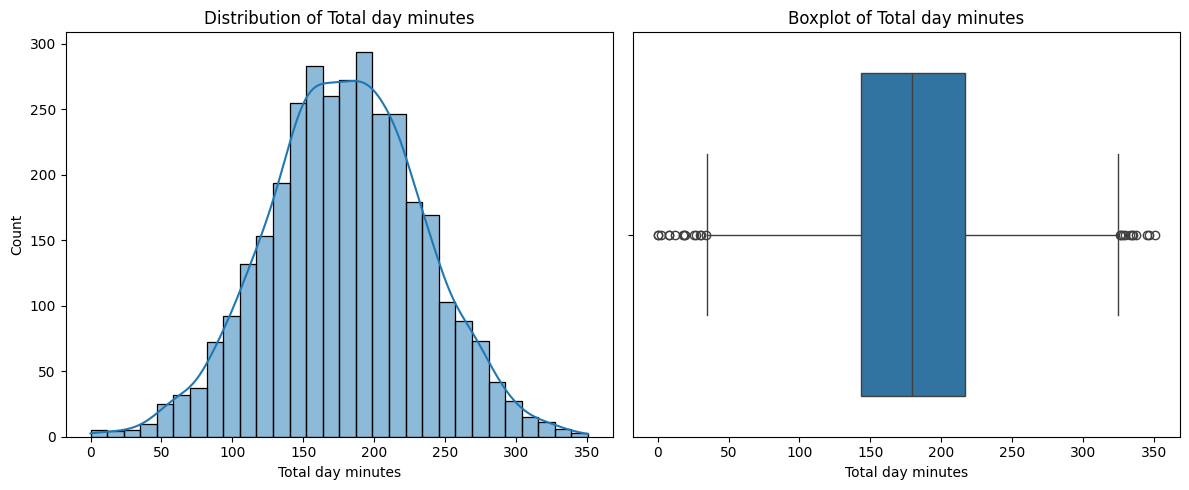

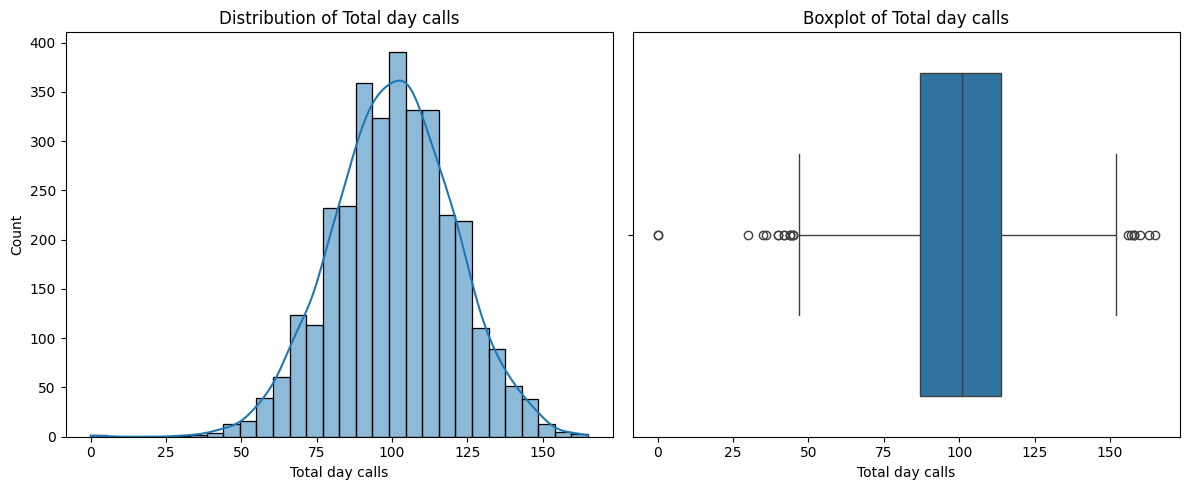

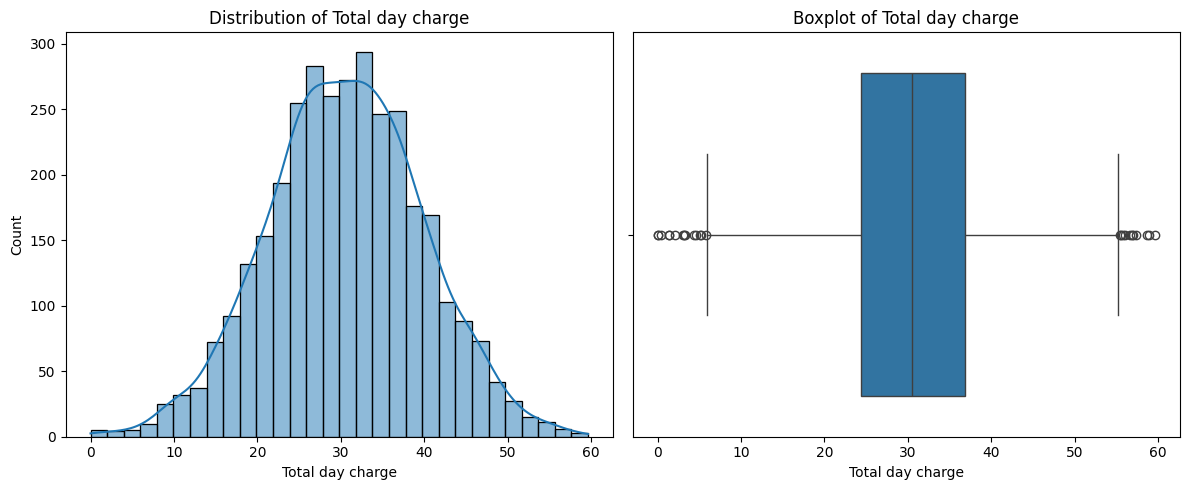

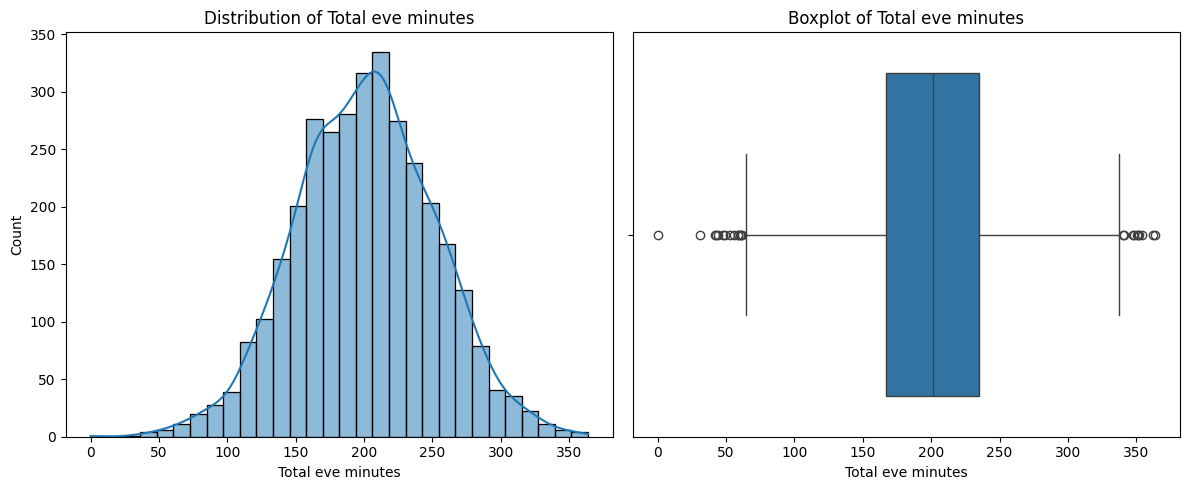

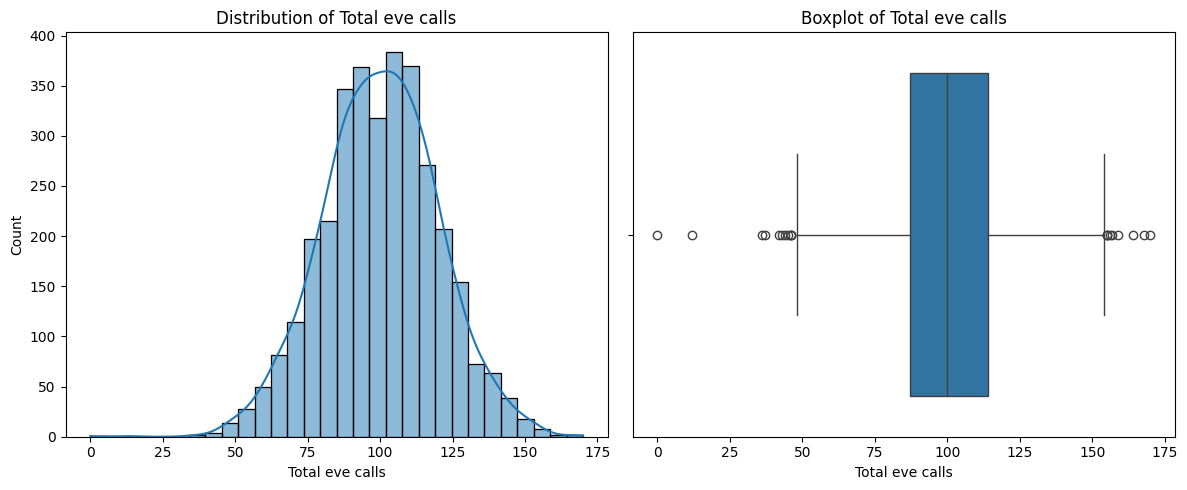

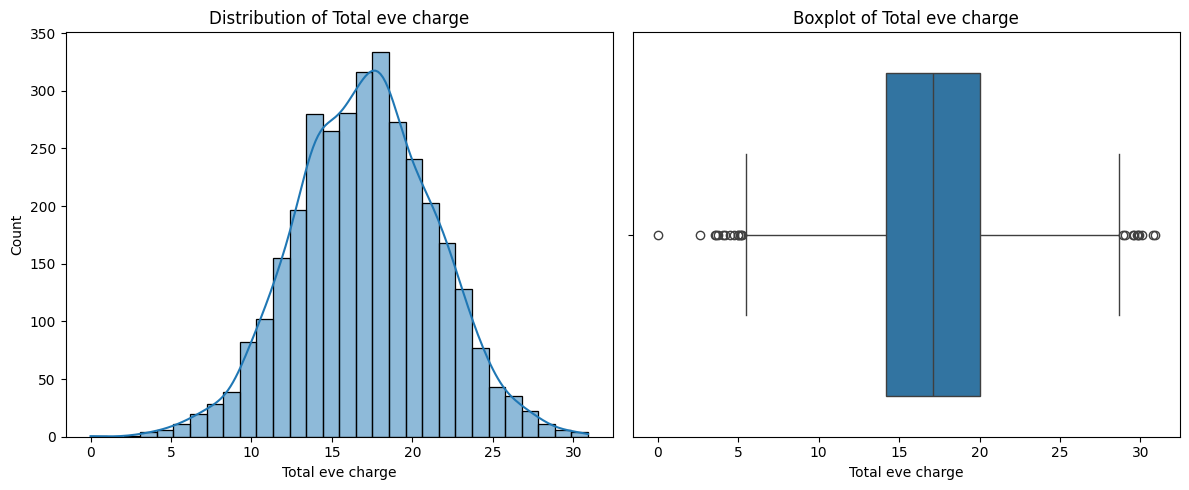

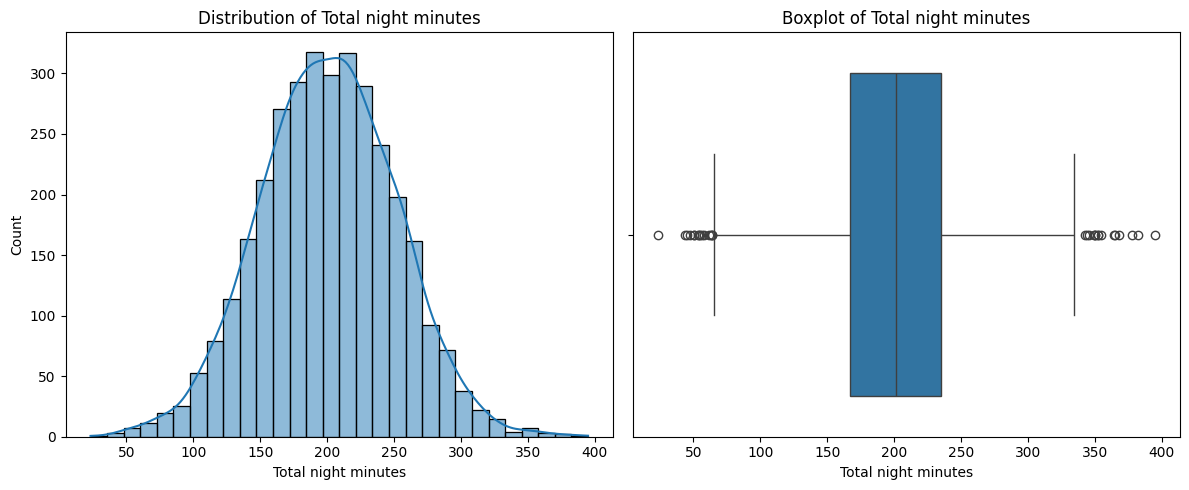

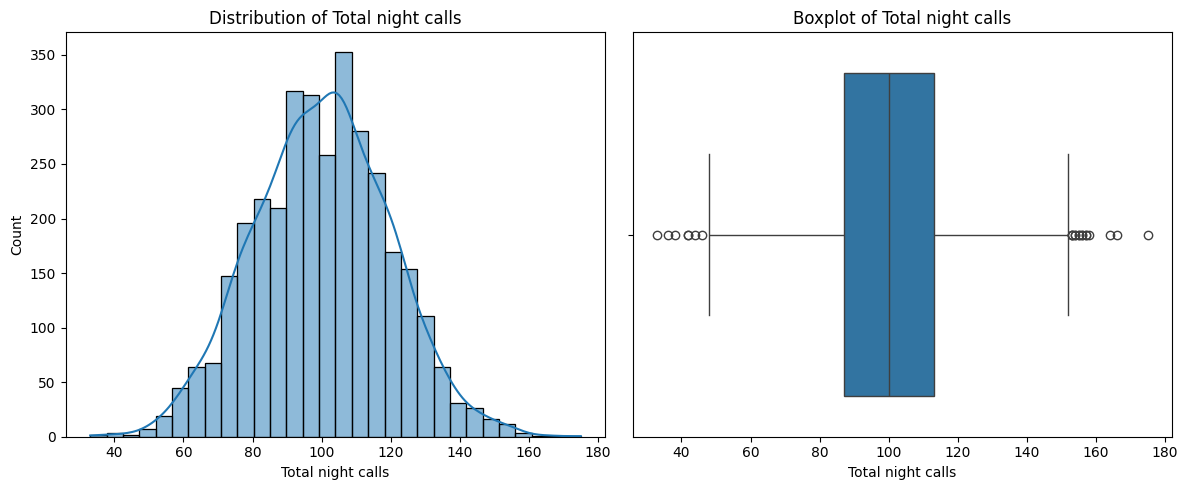

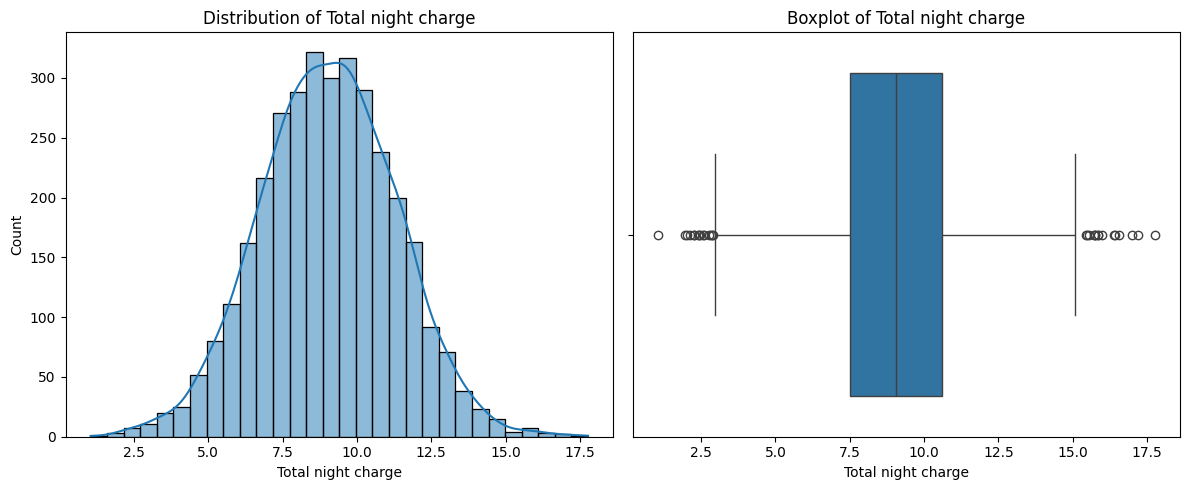

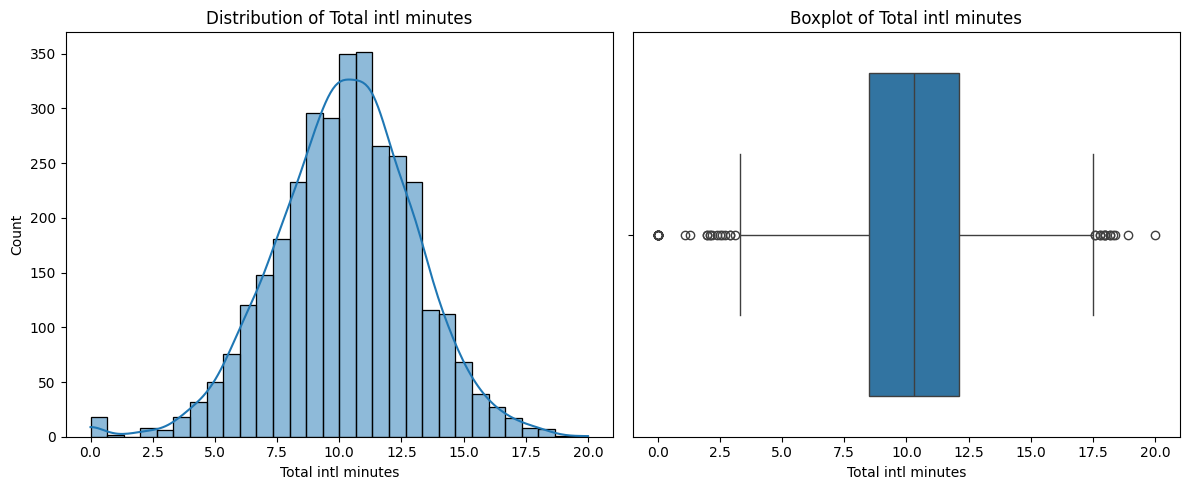

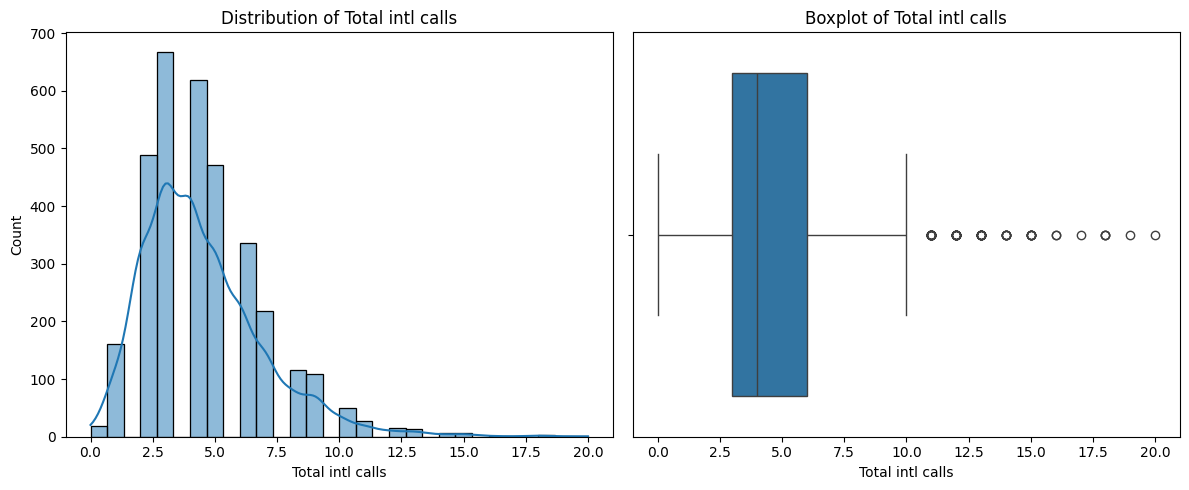

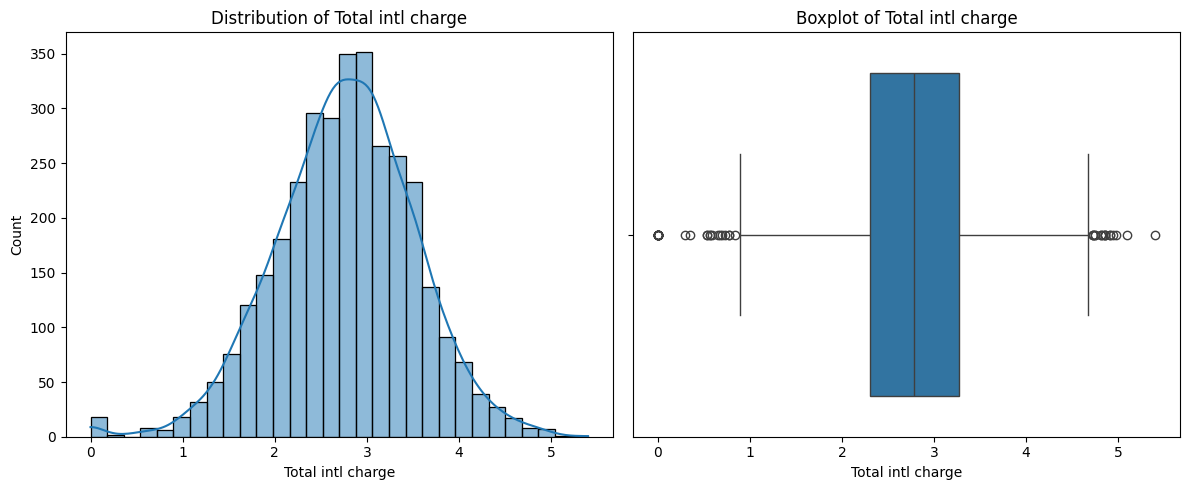

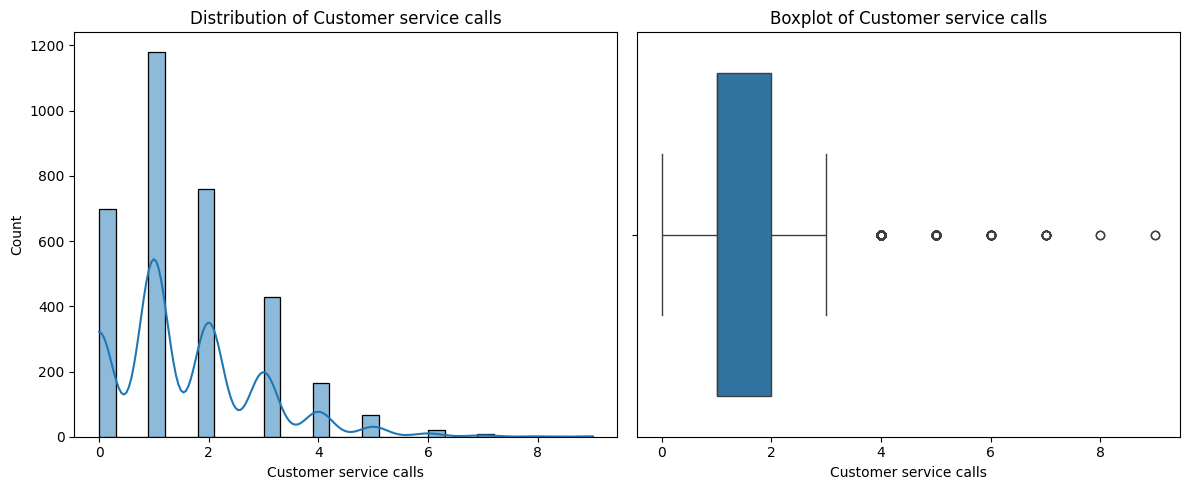

In [ ]:

# Plotting continuous columns
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Bivariate analysis

In [ ]:
import plotly.express as px

# Calculate total charges and store it in a separate variable for EDA
total_charges = (
    data['Total day charge'] +
    data['Total eve charge'] +
    data['Total night charge'] +
    data['Total intl charge']
)

# Create a DataFrame for EDA with churn and total charges
eda_df = pd.DataFrame({
    'Total Charges': total_charges,
    'Churn': data['Churn']
})

# Plot the scatter plot with Plotly
fig = px.scatter(
    eda_df,
    x='Total Charges',
    y=eda_df.index,
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},  # Non-churn: blue, Churn: red
    labels={'y': 'Customer Index'},
    title='Scatter Plot of Total Charges with Churn Status'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Total Charges",
    yaxis_title="Customer Index",
    legend_title="Churn Status",
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
# Aggregate churn and non-churn counts per state
state_churn_data = data.groupby(['State', 'Churn']).size().unstack(fill_value=0).reset_index()
state_churn_data.columns = ['State', 'Non_Churn', 'Churn']

# Prepare the map data
state_churn_data['Total'] = state_churn_data['Churn'] + state_churn_data['Non_Churn']

# Plot a choropleth map
fig = px.choropleth(
    state_churn_data,
    locations='State',
    locationmode='USA-states',
    color='Churn',  # Color based on churn count
    hover_data=['State', 'Churn', 'Non_Churn', 'Total'],
    scope='usa',
    color_continuous_scale='Reds',
    title="Churn and Non-Churn Counts Per State"
)

# Show the map
fig.show()

In [ ]:
# Aggregate the total customer service calls per state
state_calls_data = data.groupby('State')['Customer service calls'].sum().reset_index()

# Plot a choropleth map
fig = px.choropleth(
    state_calls_data,
    locations='State',
    locationmode='USA-states',
    color='Customer service calls',  # Color based on total calls
    hover_data=['State', 'Customer service calls'],
    scope='usa',
    color_continuous_scale='Blues',
    title="Customer Service Calls Per State"
)

# Show the map
fig.show()

In [ ]:
data['State'].value_counts()

,count
State,
WV,106
MN,84
NY,83
AL,80
OR,78
OH,78
WI,78
VA,77
WY,77


In [ ]:
# Comprehensive mapping of U.S. states to regions
region_mapping = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South',
    'WV': 'South', 'DC': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West'
}


In [ ]:
# Map states to regions
data['Region'] = data['State'].map(region_mapping)

In [ ]:
data.drop(columns='State', inplace=True)

In [ ]:
# Apply one-hot encoding to selected columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Convert boolean (or binary) columns to integers
data = data_encoded.astype(int)

# Display the resulting DataFrame
data.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,351,80,29,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,4,1,0,0,0,0,0
2,161,415,0,332,67,56,317,97,27,160,...,5,9,1,4,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [ ]:
data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,351,80,29,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,4,1,0,0,0,0,0
2,161,415,0,332,67,56,317,97,27,160,...,5,9,1,4,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [ ]:
data.shape

(3333, 22)

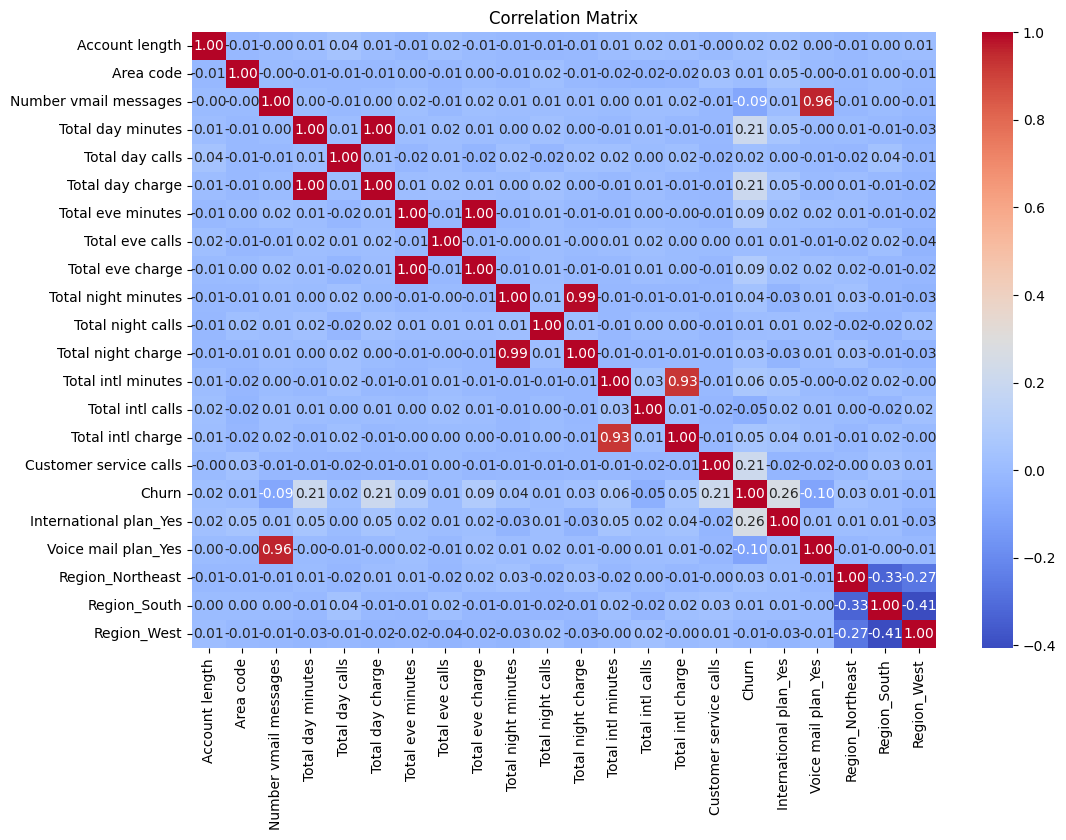

In [ ]:
# Feature Correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

• Strong correlation exists between tenure and total charges, means as tenure increases so does total charges.  
• Strong correlation exists between monthly charges and total charges as well.  
• Tenure and Contract duration seems to be strong factors in determining churn.  
• Among service types, phone service seems to be most popular.  
• CSP should investigate if customers receiving digital invoice have any concern with understanding the bill details.  
• Also, they should encourage customers to move to automated payment modes to improve customer experience.  
• Gender does not play an important role. However, CSPs should take care of the experience of senior citizens.

In [ ]:
"""# Outlier Detection
Q1 = data.quantile(0.10)
Q3 = data.quantile(0.90)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]"""

'# Outlier Detection\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR = Q3 - Q1\ndata = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]'

In [ ]:
data.shape

(3333, 22)

In [ ]:
# Splitting features and target
X = data.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data['Churn']

In [ ]:
# Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2024/12/06 19:42:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1c0f5ea905364de4b22e6952325a06ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 19:42:24 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/06 19:42:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


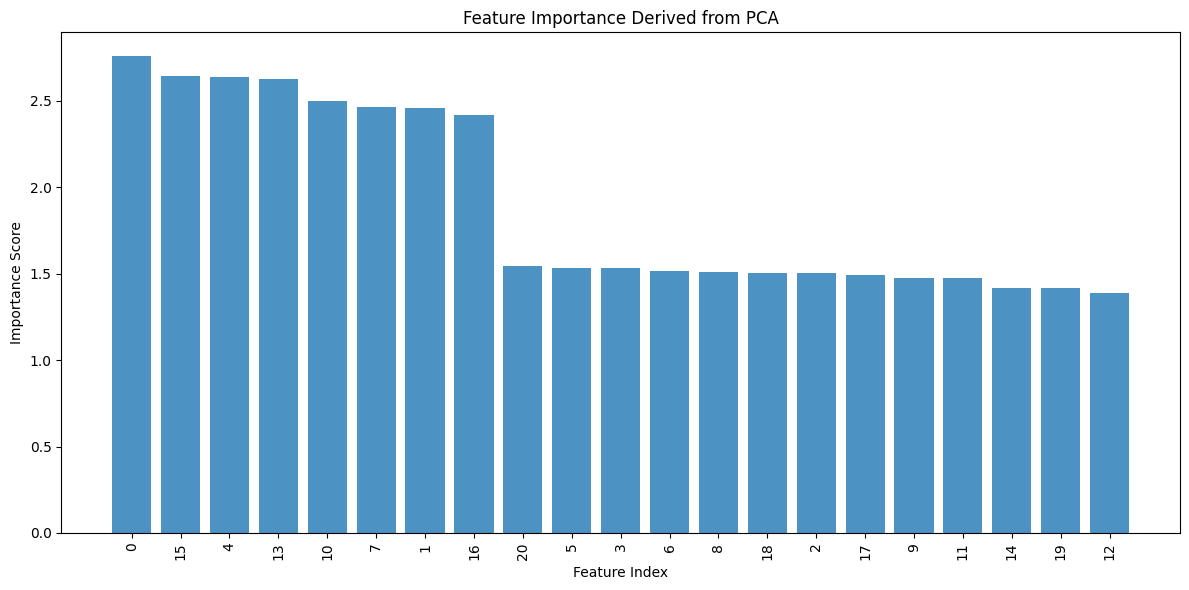

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA (retain components covering 95% variance)
pca = PCA(n_components=0.95)
pca.fit(X_scaled)

# Get the loading matrix (contribution of each feature to the principal components)
loading_matrix = pca.components_

# Sum of absolute loadings for each original feature
feature_importance = np.sum(np.abs(loading_matrix), axis=0)

# Rank features by importance
ranked_features = np.argsort(feature_importance)[::-1]  # Indices of features sorted by importance (descending)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[ranked_features], align='center', alpha=0.8)
plt.xticks(range(len(feature_importance)), ranked_features , rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance Derived from PCA")
plt.tight_layout()
plt.show()


2024/12/06 20:32:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8bf312af6aeb4a0c92ddbee8a5d70956', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:32:11 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/06 20:32:11 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


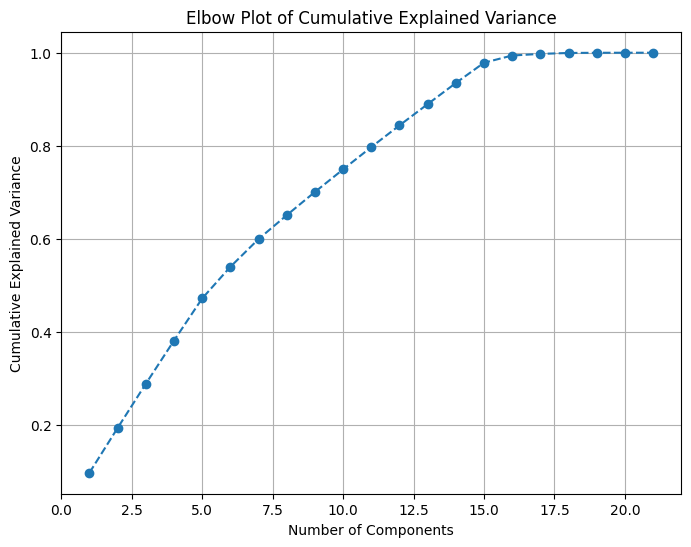

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is your input data (preprocessed)
X_pca = PCA().fit(X_scaled)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X_pca.explained_variance_ratio_) + 1),
         np.cumsum(X_pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Elbow Plot of Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[ 2.88070284, -0.05287635, -0.84982519, ...,  0.43226526,
        -0.76083087, -0.12369485],
       [-0.49456089, -1.01691535, -0.78663577, ...,  1.43460393,
         2.11836744,  1.26083703],
       [ 4.43522921,  1.92576834,  2.49889874, ...,  2.74586727,
        -0.5690532 , -0.24658133],
       ...,
       [-0.57580071,  0.82778574,  1.67506828, ...,  1.96667244,
        -1.11512268,  0.40447941],
       [ 1.62005663, -0.95418052, -0.20636118, ...,  0.39639983,
         1.96785705, -0.71707615],
       [ 2.48647258,  0.72371625, -1.14597929, ..., -0.66861362,
         0.13971549, -0.22169859]])

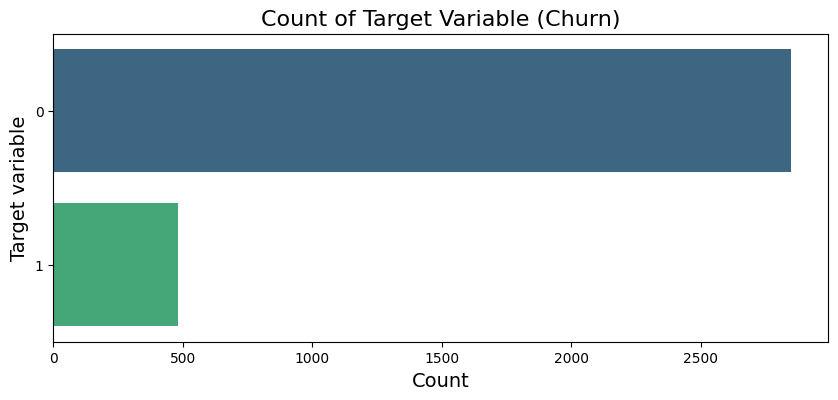

In [ ]:
plt.figure(figsize=(10, 4))
churn_counts = data['Churn'].value_counts()

# Créer un bar chart horizontal
sns.barplot(y=churn_counts.index, x=churn_counts.values, palette='viridis', orient='h')

# Ajouter des titres et labels
plt.title("Count of Target Variable (Churn)", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Target variable", fontsize=14)

plt.show()

In [ ]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to handle class imbalance
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

# Display the new shape of the data
print(f"Original dataset shape: {X_pca.shape, y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape, y_resampled.shape}")


2024/12/06 19:43:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '08ea1279836e477b87f67263cbbbcd40', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 19:43:11 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/06 19:43:11 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/12/06 19:43:11 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/06 19:43:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

Original dataset shape: ((3333, 15), (3333,))
Resampled dataset shape: ((4786, 21), (4786,))


In [ ]:
y_resampled.value_counts()

,count
Churn,
1,2785
0,2001


In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import roc_auc_score

# Initialize the LazyRegressor
Lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=roc_auc_score)

# Fit the LazyRegressor and get predictions
models, predictions = Lazy_classifier.fit(X_train, X_test, y_train, y_test)

 55%|█████▍    | 17/31 [02:21<01:44,  7.47s/it]2024/12/06 19:45:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '92c6ca2ad23a4869963a0262dc1c48b2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 19:45:39 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
2024/12/06 19:45:39 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
 97%|█████████▋| 30/31 [03:30<00:04,  4.08s/it]2024/12/06 19:46:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9bfd15490b054c3db5cdd1cdc2276629', which will tr

[LightGBM] [Info] Number of positive: 2238, number of negative: 1590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4282
[LightGBM] [Info] Number of data points in the train set: 3828, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584639 -> initscore=0.341849
[LightGBM] [Info] Start training from score 0.341849


100%|██████████| 31/31 [03:37<00:00,  7.01s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,roc_auc_score,Time Taken
Model,,,,,,
LabelPropagation,0.99,0.99,0.99,0.99,0.99,10.32
LabelSpreading,0.99,0.99,0.99,0.99,0.99,9.36
LGBMClassifier,0.99,0.99,0.99,0.99,0.99,6.31
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.99,59.57
XGBClassifier,0.98,0.98,0.98,0.98,0.98,7.25
RandomForestClassifier,0.98,0.98,0.98,0.98,0.98,8.24
BaggingClassifier,0.98,0.98,0.98,0.98,0.98,5.35
SVC,0.96,0.96,0.96,0.96,0.96,6.81
KNeighborsClassifier,0.96,0.95,0.95,0.96,0.95,5.39


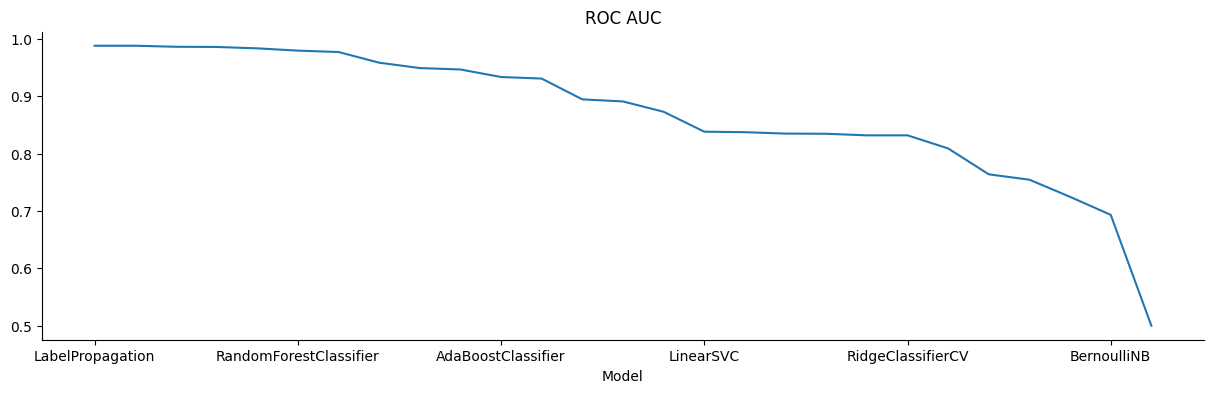

In [ ]:
# @title ROC AUC

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='line', figsize=(15, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

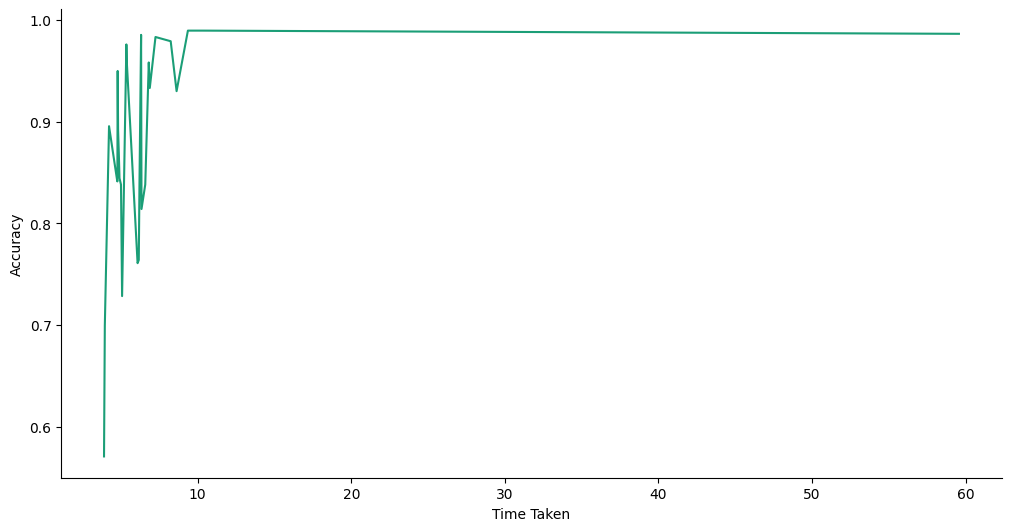

In [ ]:
# @title Time Taken vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

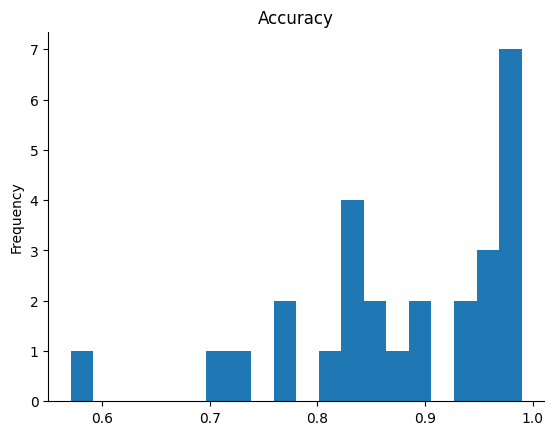

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### BaseLine Models

In [ ]:
def telecom_churn_visualization(algorithm, testing_x, testing_y, cf, threshold_plot):
    # Predictions and probabilities (no training here)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)

    # Print evaluation metrics
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))

    # Confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    # ROC AUC score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print("Area under curve:", model_roc_auc, "\n")

    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    # Plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")

    # Plot ROC curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "ROC: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0, 1], y = [0, 1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2, dash = 'dot'))

    # Visualizing coefficients or features if requested
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)

        column_df = pd.DataFrame(range(testing_x.shape[1]))  # Using index of features as column names
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True,
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)

        # Plot coefficients
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"],
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")))

        # Create subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic',
                                            'Feature importances'))
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 2)
        fig.append_trace(trace3, 1, 2)
        fig.append_trace(trace4, 2, 1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height=900, width=800,
                             plot_bgcolor='rgba(240,240,240, 0.95)',
                             paper_bgcolor='rgba(240,240,240, 0.95)',
                             margin=dict(b=195))
        fig["layout"]["xaxis2"].update(dict(title="false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title="true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid=True, tickfont=dict(size=10), tickangle=90))

    elif cf == 'None':
        # Create subplots without feature visualization
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic'))
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 2)
        fig.append_trace(trace3, 1, 2)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height=500, width=800,
                             plot_bgcolor='rgba(240,240,240, 0.95)',
                             paper_bgcolor='rgba(240,240,240, 0.95)',
                             margin=dict(b=195))
        fig["layout"]["xaxis2"].update(dict(title="false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title="true positive rate"))

    py.iplot(fig)

    # Discrimination threshold plot if requested
    if threshold_plot:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(testing_x, testing_y)
        visualizer.poof()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

# Adding the new classifiers to the models dictionary
models = {
    #"SVC": SVC(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(max_iter=1000),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "ExtraTrees": ExtraTreesClassifier(),
    "LGBM": LGBMClassifier()
}


In [ ]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Class 0)": class_report['0']['precision'],
        "Precision (Class 1)": class_report['1']['precision'],
        "Recall (Class 0)": class_report['0']['recall'],
        "Recall (Class 1)": class_report['1']['recall'],
        "F1-Score (Class 0)": class_report['0']['f1-score'],
        "F1-Score (Class 1)": class_report['1']['f1-score']
    }

In [ ]:

# Train and evaluate each model
baseline_results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    baseline_results[name] = evaluate_model(model, X_test, y_test)

# Display results
baseline_df = pd.DataFrame(baseline_results).T
print("\nBaseline Model Performance:\n")
print(baseline_df)


2024/12/06 20:57:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '560c1c653de945f084c172d84288c972', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:03 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training LogisticRegression...


2024/12/06 20:57:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4cb3199f737d46f0a1d8bd6e762492b3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:08 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training RandomForest...


2024/12/06 20:57:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7d56f47894954b4585d90fc1cebf3e2d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:15 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training NeuralNetwork...


2024/12/06 20:57:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b2e5690a4e7246258fe3fd84e3563e9d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:27 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training GradientBoosting...


2024/12/06 20:57:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e727bf6c55f244eb9a3176024467d229', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:33 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training AdaBoost...


2024/12/06 20:57:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '56ff30abfc0e4c3f9b5483755fcb84b2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


Training XGBoost...


2024/12/06 20:57:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c3fca3df218444f8aa979cade65900dd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:41 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Training ExtraTrees...


2024/12/06 20:57:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6342cd3c44694421a9d65adc294e4b82', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current lightgbm workflow


Training LGBM...
[LightGBM] [Info] Number of positive: 2238, number of negative: 1590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4283
[LightGBM] [Info] Number of data points in the train set: 3828, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584639 -> initscore=0.341849
[LightGBM] [Info] Start training from score 0.341849

Baseline Model Performance:

                    Accuracy  Precision (Class 0)  Precision (Class 1)  \
LogisticRegression      0.84                 0.83                 0.85   
RandomForest            0.98                 0.98                 0.99   
NeuralNetwork           0.98                 0.99                 0.96   
GradientBoosting        0.97                 0.95                 0.98   
AdaBoost                0.93  

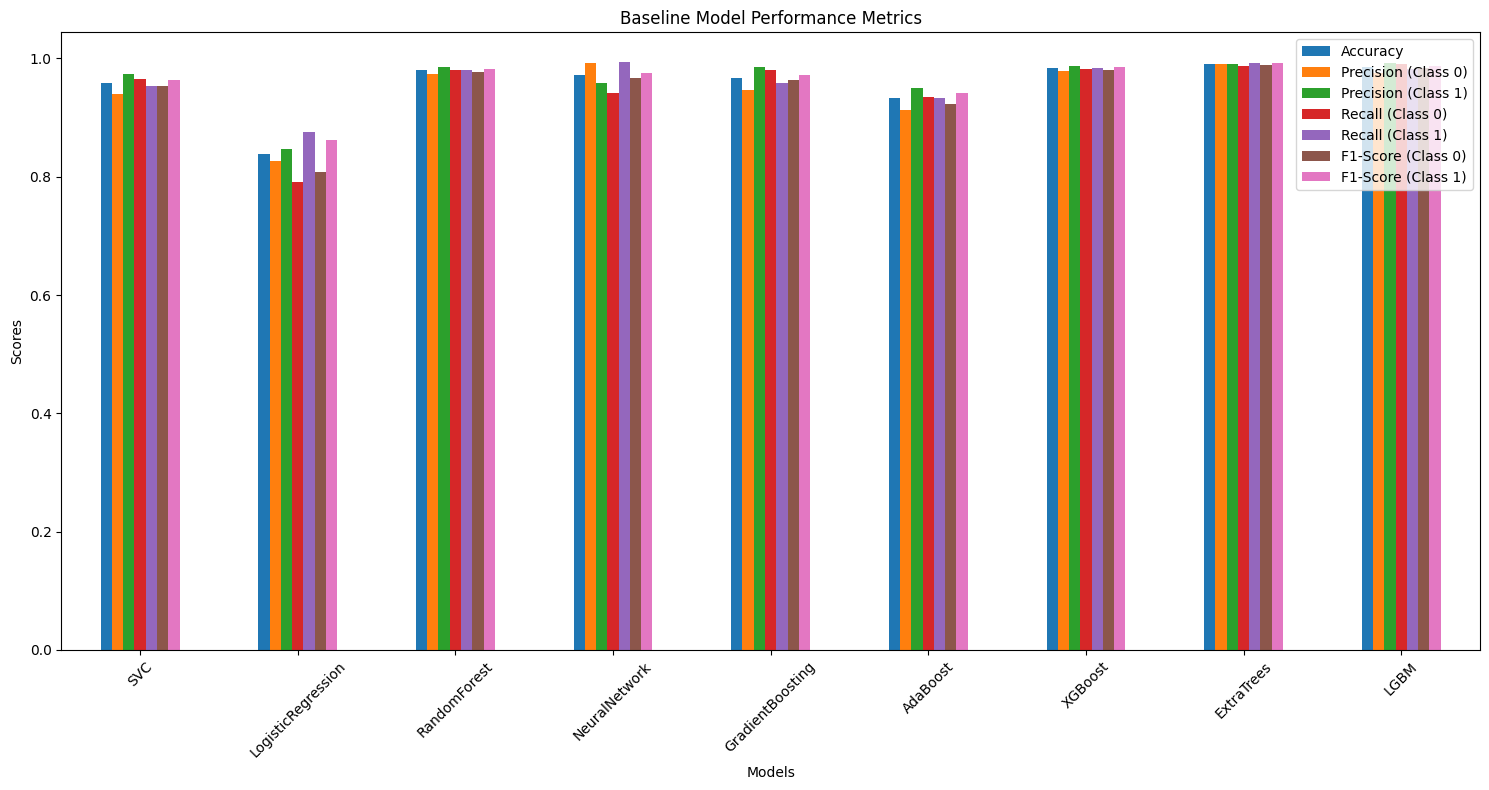

In [ ]:
# Plot results
baseline_df.plot(kind='bar', figsize=(15, 8))
plt.title('Baseline Model Performance Metrics')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Evaluating LogisticRegression...
Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       411
           1       0.85      0.88      0.86       547

    accuracy                           0.84       958
   macro avg       0.84      0.83      0.83       958
weighted avg       0.84      0.84      0.84       958

Accuracy Score: 0.8392484342379958
Area under curve: 0.83321990774719 



2024/12/06 20:57:59 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a8aa9c93393948f38eedf4b7c82ce4a5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:57:59 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/12/06 20:58:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'db5e466ae07c46f2b6460bbeb74b18e0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 20:58:04 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/12/06 20:58:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e9d02300466247db85b258f16fd1c5d5', which will track hyperparamete

KeyboardInterrupt: 

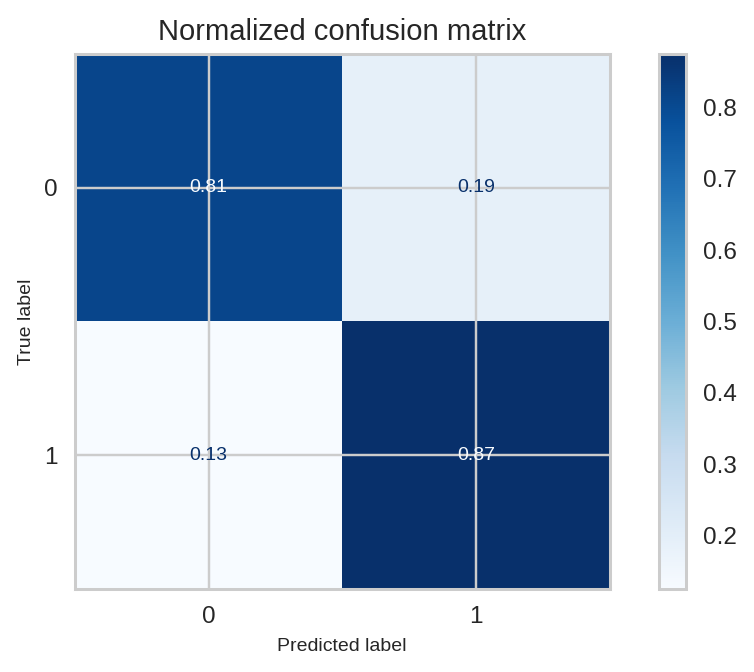

In [ ]:
# Generate confusion matrices
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    plot_confusion_matrix(y_test, y_pred, name)

In [ ]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test using cross-validation results
def cross_val_metrics(model, X, y, metric_function):
    scores = cross_val_score(model, X, y, scoring=metric_function, cv=10)
    return scores

print("\nStatistical Comparison Using Wilcoxon Signed-Rank Test:\n")
metrics = ['accuracy', 'f1_weighted']  # Metrics for cross-validation scoring
model_names = list(models.keys())

# Collect cross-validation scores for all models
cv_scores = {name: {metric: cross_val_metrics(models[name], X, y, metric) for metric in metrics} for name in models}

for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model_1 = model_names[i]
        model_2 = model_names[j]
        for metric in metrics:
            stat, p = wilcoxon(
                cv_scores[model_1][metric], cv_scores[model_2][metric]
            )
            print(f"{model_1} vs {model_2} ({metric}): p-value = {p:.5f}")
            if p < 0.05:
                print(f"\tSignificant difference found for {metric}!")
            else:
                print(f"\tNo significant difference for {metric}.")



Statistical Comparison Using Wilcoxon Signed-Rank Test:

SVC vs LogisticRegression (accuracy): p-value = 0.26039
	No significant difference for accuracy.
SVC vs LogisticRegression (f1_weighted): p-value = 0.00195
	Significant difference found for f1_weighted!
SVC vs RandomForest (accuracy): p-value = 0.00195
	Significant difference found for accuracy!
SVC vs RandomForest (f1_weighted): p-value = 0.00195
	Significant difference found for f1_weighted!
SVC vs NeuralNetwork (accuracy): p-value = 0.08398
	No significant difference for accuracy.
SVC vs NeuralNetwork (f1_weighted): p-value = 0.00195
	Significant difference found for f1_weighted!
SVC vs GradientBoosting (accuracy): p-value = 0.00195
	Significant difference found for accuracy!
SVC vs GradientBoosting (f1_weighted): p-value = 0.00195
	Significant difference found for f1_weighted!
SVC vs AdaBoost (accuracy): p-value = 0.00195
	Significant difference found for accuracy!
SVC vs AdaBoost (f1_weighted): p-value = 0.00195
	Significan


### Statistical Comparison of Model Performance

The Wilcoxon Signed-Rank Test was conducted to compare the performance of baseline models on two metrics: **accuracy** and **f1_weighted**. The following observations and insights were drawn from the results:

#### General Observations:
1. **Significant Differences:**
   - Several model pairs showed statistically significant differences in their performance for both accuracy and F1-Weighted metrics (p-value < 0.05). This indicates meaningful differences in performance between these models.

2. **No Significant Differences:**
   - Some model pairs, such as RandomForest vs GradientBoosting and NeuralNetwork vs AdaBoost, showed no significant differences for specific metrics, indicating comparable performance.

#### Key Findings by Metric:
1. **Accuracy:**
   - SVC showed significant differences in accuracy compared to models such as RandomForest, GradientBoosting, AdaBoost, and XGBoost, highlighting its distinct performance.
   - LogisticRegression exhibited significant differences in accuracy with most other models except NeuralNetwork.
   - GradientBoosting and RandomForest had no significant difference in accuracy, suggesting similar capabilities for this metric.

2. **F1-Weighted:**
   - SVC demonstrated significantly different F1-Weighted scores compared to all other models except LogisticRegression.
   - LogisticRegression showed significant differences in F1-Weighted scores when compared to RandomForest, GradientBoosting, and XGBoost.
   - GradientBoosting and RandomForest exhibited no significant difference in F1-Weighted scores, reinforcing their comparable performance.

#### Individual Pair Highlights:
- **SVC vs RandomForest:** Significant differences were found for both accuracy and F1-Weighted, indicating these models behave distinctly.
- **RandomForest vs GradientBoosting:** No significant difference was observed for either metric, suggesting these models may perform similarly in the current dataset.
- **AdaBoost vs XGBoost:** Significant differences were observed for both metrics, showing these models have unique strengths.

#### Conclusion:
The analysis provides critical insights into the performance similarities and differences between models. While certain models, such as RandomForest and GradientBoosting, showed comparable results, others like SVC and LogisticRegression exhibited significant performance differences with most counterparts. These findings can guide model selection based on the importance of metrics like accuracy or F1-Weighted in the given task.


In [ ]:
param_grids = {
    'SVC': {
        'model': SVC(),
        'params': {'C': [1, 10, 100]}  # Focused range around the best C (100)
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10]}  # Narrowed range around the best C (1)
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': [18, 20, 22],  # Reduced range around the best max_depth (20)
            'n_estimators': [15, 20, 25]  # Focused range around the best n_estimators (20)
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(8,), (9,), (10,)],  # Around the best size (9)
            'activation': ['relu'],  # Fixed at the best option
            'solver': ['adam']  # Fixed at the best option
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'max_depth': [5, 10, 15],  # Reduced range
            'min_samples_leaf': [5, 8, 10],  # Reduced range
            'max_leaf_nodes': [3, 5, 7]  # Reduced range
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [200, 250, 300],  # Around the best n_estimators (250)
            'learning_rate': [0.1, 0.3, 0.5]  # Around the best learning_rate (0.3)
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [800, 1000, 1200],  # Around the best n_estimators (1000)
            'learning_rate': [0.05, 0.1, 0.2]  # Around the best learning_rate (0.1)
        }
    }
}


In [ ]:
"""import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

# Enable MLflow autologging
mlflow.autolog()

# Placeholder to store results
best_models = {}

# Set up MLflow experiment (optional)
mlflow.set_experiment("Models Grid Search")

# Perform Grid Search for each model
for name, config in param_grids.items():
    with mlflow.start_run(run_name=name):  # Start a new run for each model
        print(f"Starting Grid Search for {name}...")

        # Grid Search
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                                   scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)  # Replace with your dataset

        # Extract and save the best estimator
        best_models[name] = grid_search.best_estimator_

        print(f"Best params for {name}: {grid_search.best_params_}\n")

# Display all best models
print("Best Models and Hyperparameters:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")"""


'import mlflow\nimport mlflow.sklearn\nfrom sklearn.model_selection import GridSearchCV\n\n# Enable MLflow autologging\nmlflow.autolog()\n\n# Placeholder to store results\nbest_models = {}\n\n# Set up MLflow experiment (optional)\nmlflow.set_experiment("Models Grid Search")\n\n# Perform Grid Search for each model\nfor name, config in param_grids.items():\n    with mlflow.start_run(run_name=name):  # Start a new run for each model\n        print(f"Starting Grid Search for {name}...")\n\n        # Grid Search\n        grid_search = GridSearchCV(estimator=config[\'model\'], param_grid=config[\'params\'],\n                                   scoring=\'accuracy\', cv=10, verbose=1, n_jobs=-1)\n        grid_search.fit(X_train, y_train)  # Replace with your dataset\n\n        # Extract and save the best estimator\n        best_models[name] = grid_search.best_estimator_\n\n        print(f"Best params for {name}: {grid_search.best_params_}\n")\n\n# Display all best models\nprint("Best Models and

In [ ]:
"""import pickle

# Save best parameters and models to a file
with open('best_models.pkl', 'wb') as f:
    pickle.load(best_models, f)"""


"import pickle\n\n# Save best parameters and models to a file\nwith open('best_models.pkl', 'wb') as f:\n    pickle.load(best_models, f)"

In [ ]:
"""from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score




# Generate confusion matrices
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    # Evaluate metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    print("********************************************************")

    plot_confusion_matrix(y_test, y_pred, model_name)"""


'from sklearn.metrics import confusion_matrix\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score\n\n\n\n\n# Generate confusion matrices\nfor model_name, model in best_models.items():\n    print(f"\nEvaluating {model_name}...")\n    y_pred = model.predict(X_test)\n    print("********************************************************")\n    # Evaluate metrics\n    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")\n    print(f"Precision: {precision_score(y_test, y_pred)}")\n    print(f"Recall: {recall_score(y_test, y_pred)}")\n    print(f"F1 Score: {f1_score(y_test, y_pred)}")\n    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")\n    print("********************************************************")\n\n    plot_confusion_matrix(y_test, y_pred, model_name)'

2024/12/06 19:49:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1f709e7cb29b42f586f2abf3e4d5ece0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/06 19:49:35 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


********************************************************
Accuracy: 0.9676409185803758
Precision: 0.9849624060150376
Recall: 0.9579524680073126
F1 Score: 0.9712696941612604
ROC-AUC: 0.993136640022774
********************************************************


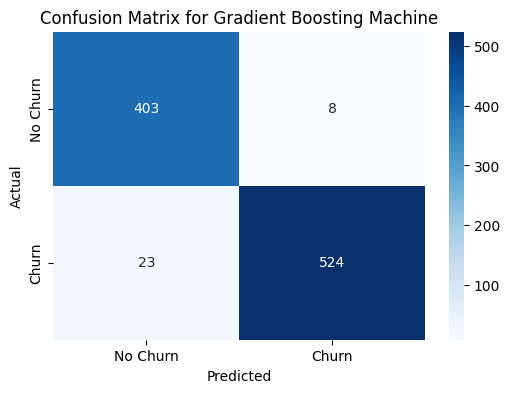

SHAP Summary Plot for Gradient Boosting Machine


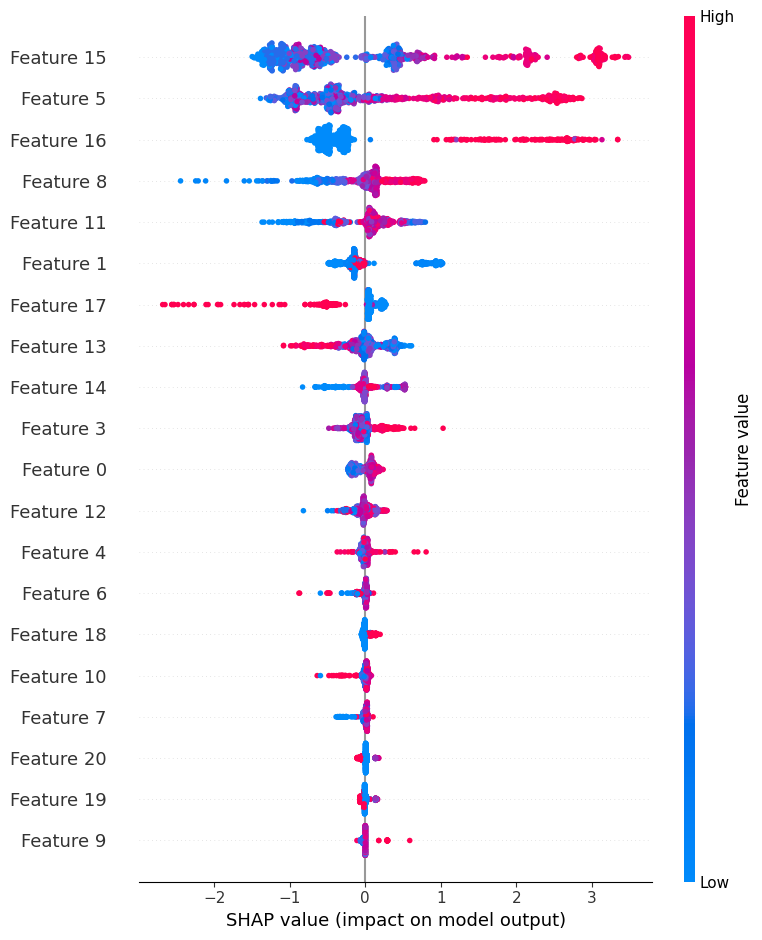

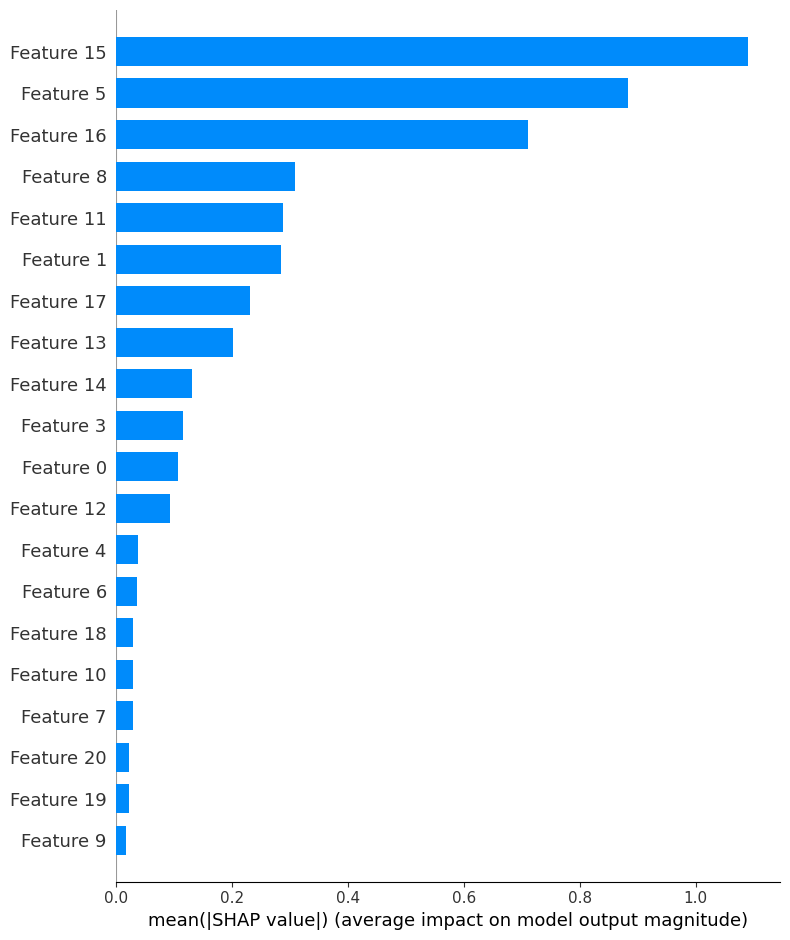

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Create and train GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# 2. Make predictions
y_pred = gbm_model.predict(X_test)

# 3. Evaluate metrics
print("********************************************************")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])}")
print("********************************************************")

# 4. Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for GBM
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting Machine")




In [ ]:
data.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'International plan_Yes',
       'Voice mail plan_Yes', 'Region_Northeast', 'Region_South',
       'Region_West'],
      dtype='object')

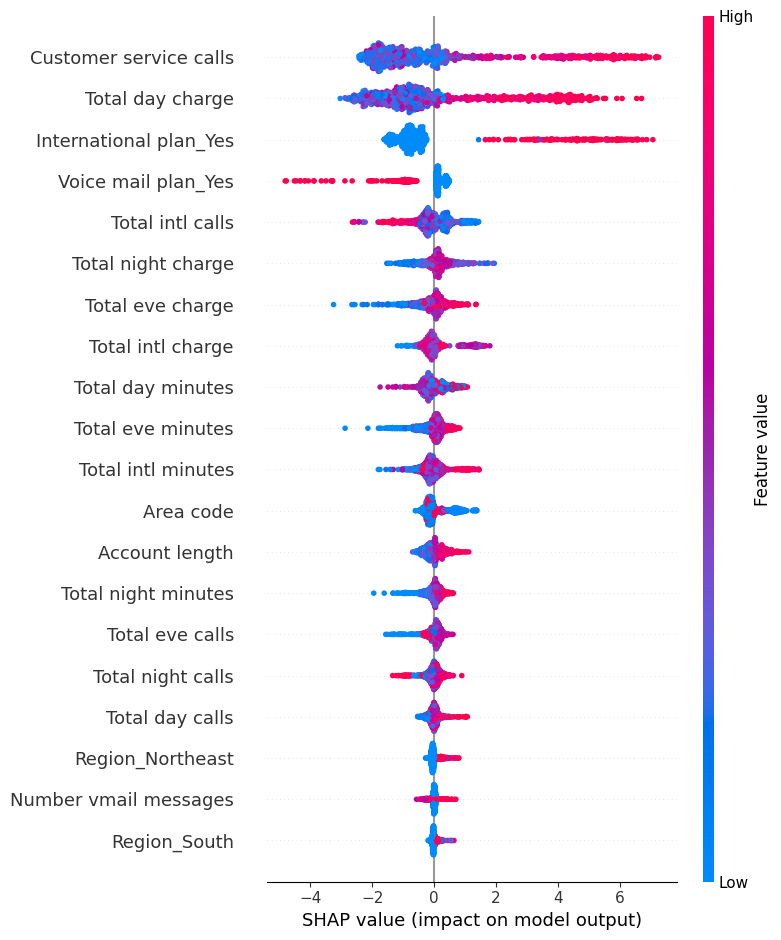

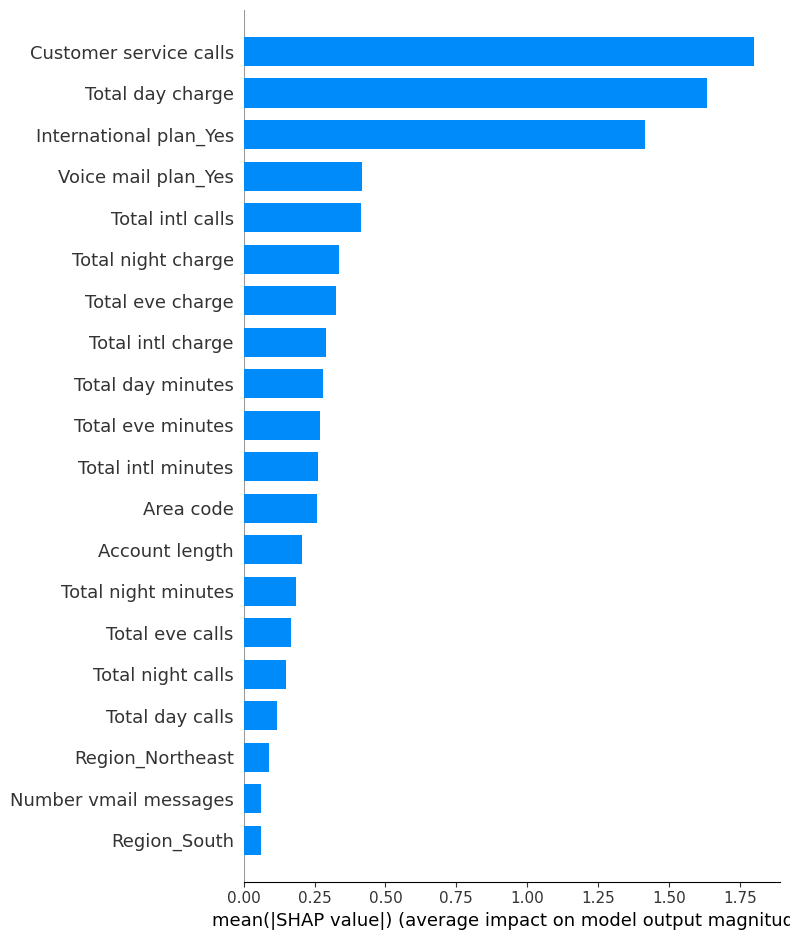

In [ ]:
import shap

# Assuming model and X_test are already defined
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Beeswarm plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


### Deep Learning

In [ ]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification


In [ ]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train,epochs=10,batch_size=50,verbose=1) # fit model
model.summary()


In [ ]:
scores=model.evaluate(X_resampled, y_resampled)


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))


In [ ]:
# Import necessary libraries
import tensorflow as tf

# Build the RNN model
model_rnn = tf.keras.Sequential([
    # First RNN layer with regularization
    tf.keras.layers.SimpleRNN(128, input_shape=(X_train.shape[1], 1), activation="tanh",
                              return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    # Second RNN layer with regularization
    tf.keras.layers.SimpleRNN(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    # Third RNN layer with regularization
    tf.keras.layers.SimpleRNN(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    # Final RNN layer before the output
    tf.keras.layers.SimpleRNN(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    # Dense output layer with sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Define early stopping
early_stopping_rnn = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

# Display the model summary
model_rnn.summary()


### LSTM

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], 1), activation="tanh",
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.LSTM(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 21, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 21, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 21, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 2)                   │             536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,531 (584.11 KB)

 Trainable params: 149,531 (584.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

2024/12/06 20:20:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '693e4c0abcc44846834567f219629f2f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/12/06 20:20:09 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5978 - loss: 0.8948

60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 140ms/step - accuracy: 0.5981 - loss: 0.8938 - val_accuracy: 0.6169 - val_loss: 0.7351
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6384 - loss: 0.7084

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6385 - loss: 0.7081 - val_accuracy: 0.6743 - val_loss: 0.6718
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6670 - loss: 0.6597

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.6671 - loss: 0.6596 - val_accuracy: 0.7276 - val_loss: 0.6211
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6899 - loss: 0.6352

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.6901 - loss: 0.6351 - val_accuracy: 0.7265 - val_loss: 0.6080
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.7089 - loss: 0.6147 - val_accuracy: 0.7025 - val_loss: 0.6132
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7275 - loss: 0.6033

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.7277 - loss: 0.6032 - val_accuracy: 0.7578 - val_loss: 0.5692
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7566 - loss: 0.5761

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.7566 - loss: 0.5760 - val_accuracy: 0.7537 - val_loss: 0.5679
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7539 - loss: 0.5787

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.7541 - loss: 0.5784 - val_accuracy: 0.7954 - val_loss: 0.5161
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.7850 - loss: 0.5327 - val_accuracy: 0.7526 - val_loss: 0.5547
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7837 - loss: 0.5290

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7838 - loss: 0.5287 - val_accuracy: 0.8236 - val_loss: 0.4822
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8084 - loss: 0.4920

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8082 - loss: 0.4921 - val_accuracy: 0.8455 - val_loss: 0.4462
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8117 - loss: 0.4845

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.8117 - loss: 0.4846 - val_accuracy: 0.8445 - val_loss: 0.4416
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8212 - loss: 0.4693

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.8213 - loss: 0.4692 - val_accuracy: 0.8737 - val_loss: 0.4028
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.8265 - loss: 0.4586 - val_accuracy: 0.8685 - val_loss: 0.4177
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8378 - loss: 0.4387

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8377 - loss: 0.4388 - val_accuracy: 0.8810 - val_loss: 0.3742
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8330 - loss: 0.4392

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8331 - loss: 0.4390 - val_accuracy: 0.8852 - val_loss: 0.3590
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8457 - loss: 0.4223

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8458 - loss: 0.4222 - val_accuracy: 0.8925 - val_loss: 0.3426
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8635 - loss: 0.3946 - val_accuracy: 0.8695 - val_loss: 0.3715
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8549 - loss: 0.3964

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.8550 - loss: 0.3964 - val_accuracy: 0.8987 - val_loss: 0.3310
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8646 - loss: 0.3764

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8645 - loss: 0.3765 - val_accuracy: 0.8967 - val_loss: 0.3230
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8655 - loss: 0.3669 - val_accuracy: 0.8914 - val_loss: 0.3253
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8649 - loss: 0.3821 - val_accuracy: 0.8758 - val_loss: 0.3492
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.8654 - loss: 0.3716 - val_accuracy: 0.8883 - val_loss: 0.3294
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8700 - loss: 0.3694

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8701 - loss: 0.3693 - val_accuracy: 0.9050 - val_loss: 0.2987
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8773 - loss: 0.3444

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.8773 - loss: 0.3445 - val_accuracy: 0.9154 - val_loss: 0.2862
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8884 - loss: 0.3251 - val_accuracy: 0.8977 - val_loss: 0.2899
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8930 - loss: 0.3376

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.8931 - loss: 0.3375 - val_accuracy: 0.9186 - val_loss: 0.2762
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.9012 - loss: 0.3115 - val_accuracy: 0.9123 - val_loss: 0.2896
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9009 - loss: 0.3047 - val_accuracy: 0.8946 - val_loss: 0.2918
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.9013 - loss: 0.3102 - val_accuracy: 0.8883 - val_loss: 0.3258
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8977 - loss: 0.3056

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.8976 - loss: 0.3058 - val_accuracy: 0.9123 - val_loss: 0.2741
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8983 - loss: 0.3262

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8984 - loss: 0.3259 - val_accuracy: 0.9144 - val_loss: 0.2704
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9026 - loss: 0.3035

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9028 - loss: 0.3033 - val_accuracy: 0.9165 - val_loss: 0.2551
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9167 - loss: 0.2841 - val_accuracy: 0.9092 - val_loss: 0.2891
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9094 - loss: 0.2977 - val_accuracy: 0.9165 - val_loss: 0.2580
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9262 - loss: 0.2570

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9262 - loss: 0.2572 - val_accuracy: 0.9217 - val_loss: 0.2530
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9319 - loss: 0.2490 - val_accuracy: 0.9186 - val_loss: 0.2617
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9214 - loss: 0.2724 - val_accuracy: 0.9228 - val_loss: 0.2583
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9184 - loss: 0.2680

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9184 - loss: 0.2680 - val_accuracy: 0.9353 - val_loss: 0.2268
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9365 - loss: 0.2314

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9365 - loss: 0.2316 - val_accuracy: 0.9384 - val_loss: 0.2171
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9217 - loss: 0.2464 - val_accuracy: 0.9238 - val_loss: 0.2501
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.9294 - loss: 0.2554 - val_accuracy: 0.9238 - val_loss: 0.2490
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9271 - loss: 0.2444

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9272 - loss: 0.2443 - val_accuracy: 0.9447 - val_loss: 0.2120
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9447 - loss: 0.2206 - val_accuracy: 0.9322 - val_loss: 0.2284
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9431 - loss: 0.2146 - val_accuracy: 0.9228 - val_loss: 0.2510
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9299 - loss: 0.2540 - val_accuracy: 0.9436 - val_loss: 0.2135
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9421 - loss: 0.2127 - val_accuracy: 0.9384 - val_loss: 0.2171
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9415 - loss: 0.2115

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9415 - loss: 0.2116 - val_accuracy: 0.9426 - val_loss: 0.2056
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9478 - loss: 0.1900 - val_accuracy: 0.9363 - val_loss: 0.2430
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9377 - loss: 0.2230 - val_accuracy: 0.9447 - val_loss: 0.2247
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


In [ ]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9274 - loss: 0.2249
[0.20556268095970154, 0.942588746547699]
Loss =  0.20556268095970154
Accuracy =  0.942588746547699


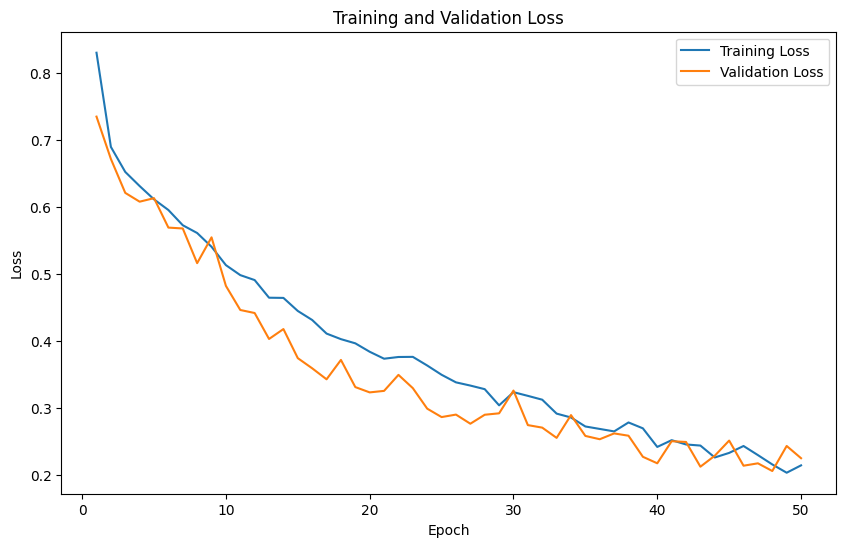

In [ ]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
predicted = model_lstm.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
predicted[:10]


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

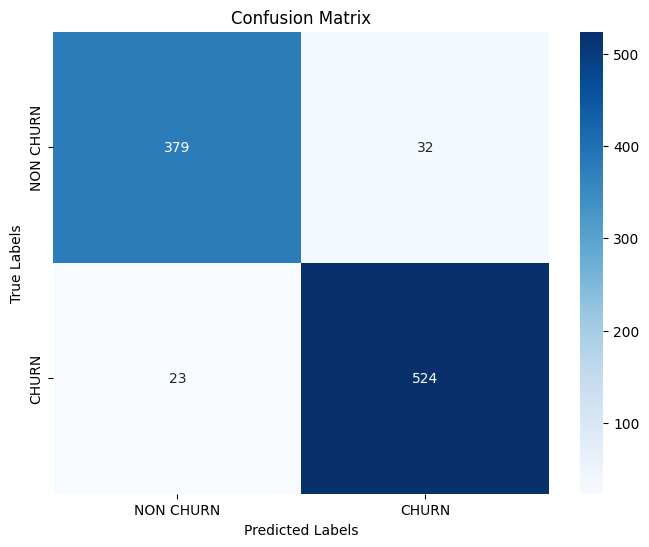

In [ ]:
cm = confusion_matrix(y_test, predicted)

class_labels = ['NON CHURN', 'CHURN']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()